In [2]:
import numpy as np
import seaborn as sns
import math
import pandas as pd
# Can be done with math


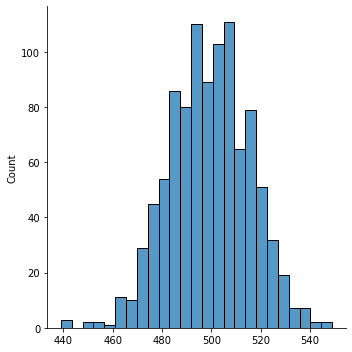

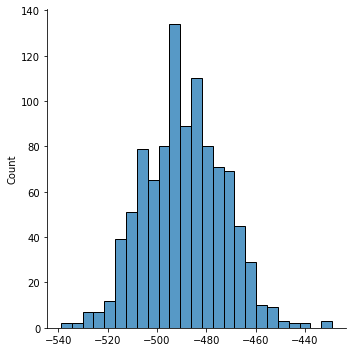

In [95]:
trails = 1000
p = 0.5
samples = 1000

sample = np.random.binomial(trails,p,samples)
negsample = [10 - x for x in sample]
sns.displot(sample)
sns.displot(negsample)
# Both of the graphs

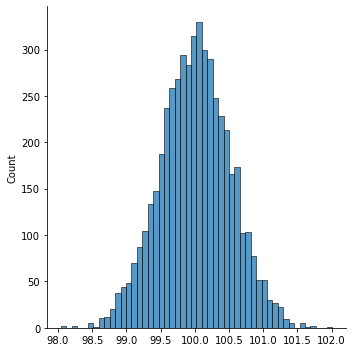

In [93]:
# Normal Distribution for comparison
sample = np.random.normal(100,0.5,5000)
sns.displot(sample)


<Axes: xlabel='n/N', ylabel='Sum'>

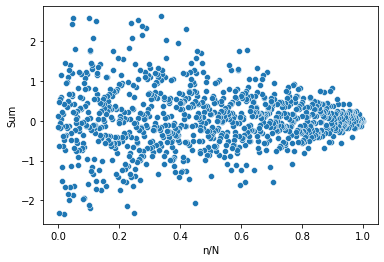

In [88]:
# Show the convergence thing
def run(n):
    sample = np.random.binomial(1,0.5,n)
    iid = [-1 if b == 0 else b for b in sample]
    gain = sum(iid)
    return gain
# Defined the Big N
big_N = 1000
run_list = np.arange(big_N)
x_val = [x/big_N for x in run_list]
y_val = [run(x)*(1/math.sqrt(big_N)) for x in run_list]

data = pd.DataFrame({'n/N': list(reversed(x_val))
, 'Sum': y_val})
sns.scatterplot(x='n/N', y='Sum', data=data)


<Axes: ylabel='Proportion'>

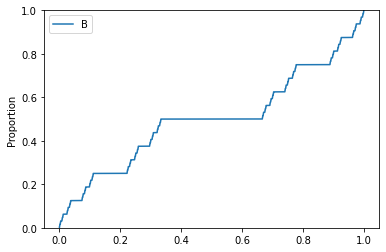

In [26]:
# Part two, symmetry property

# Generation of Bernouille Scheme
# List of Possible Values
# List of probability of picking value
def berScheme(values,prob):
    if sum(prob) != 1:
        print("Error, not valid")
    return np.random.choice(values, p=prob)
# Use this for Cantor Distribution
# Generate Cantor for step n
def Cantor(n):
    if n == 0:
        return np.array([0,1])
    antecedent = Cantor(n-1)
    antecedentR = [x + 2 for x in antecedent]
    joined = np.concatenate((antecedent, antecedentR))
    return [x /3.0 for x in joined]


# Show property being verified
data = Cantor(10)


data_preproc = pd.DataFrame({ 
        'B': np.array(data)
})

sns.ecdfplot(data=data_preproc)

<Axes: ylabel='Proportion'>

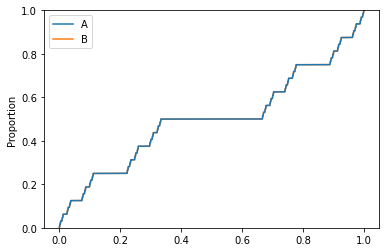

In [25]:
# Symmetry property. Graphing the symmetry shows they have the same CDF?
data_preproc = pd.DataFrame({ 
    'A': np.array([1 - x for x in data]),
    'B': np.array(data)
})

sns.ecdfplot(data=data_preproc)

8
8


<Axes: ylabel='Proportion'>

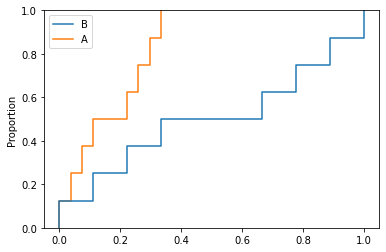

In [57]:
similarity = Cantor(3)
sim = [x for x in similarity if x < 0.4333333]

print(len(sim))
print(len(Cantor(2)))
data_preproc = pd.DataFrame({ 
        'B': np.array(Cantor(2)),
        'A': np.array(sim)
})

sns.ecdfplot(data=data_preproc)

2048


<Axes: ylabel='Proportion'>

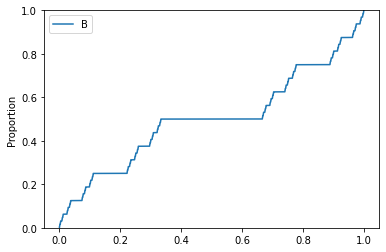

In [61]:
# Cantor big boi
data = Cantor(10)
print(len(data))

data_preproc = pd.DataFrame({ 
        'B': np.array(data)
})

sns.ecdfplot(data=data_preproc)

In [ ]:
# Exponential distribution generator
exp = np.random.Generator.exponential(scale=1.0, size=100)
pois = np.random.Generator.poisson(lam=1.0, size=100)


# Poisson distribution generator
# X^2 generator

<Axes: xlabel='n', ylabel='Sum'>

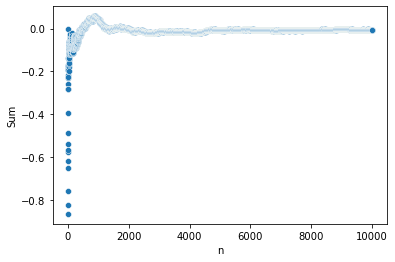

In [99]:
# Empirical Verification of law of large number
big_N = 10000
norm = np.random.default_rng().normal(loc=0.0, scale=1.0, size=big_N)
run_list = np.arange(big_N)
sums = np.zeros(big_N)


# First we want to get the sum for every point until small n, divded by n
for i in range(big_N):
    sn = sum(norm[:i])
    sums[i] = sn/(i+1)

x_val = []
y_val = []
data = pd.DataFrame({'n': run_list
, 'Sum': sums})
sns.scatterplot(x='n', y='Sum', data=data)

# Investigate some other things

<Axes: xlabel='n', ylabel='n(S(n)/n − a)'>

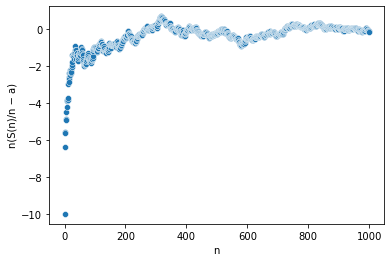

In [100]:
# Central limit theorem
# Empirical Verification of law of large number
big_N = 1000
a=10
b = 1.0
norm = np.random.default_rng().normal(loc=a, scale=b, size=big_N)
run_list = np.arange(big_N)
vals = np.zeros(big_N)


# First we want to get the sum for every point until small n, divded by n
for i in range(big_N):
    sn = sum(norm[:i])
    vals[i] = math.sqrt((i+1)) * (sn /(i+1) - a)

data = pd.DataFrame({'n': run_list
, 'n(S(n)/n − a)': vals})
sns.scatterplot(x='n', y='n(S(n)/n − a)', data=data)

# Trends towards zero, aka normalised

In [101]:
# Unit simplex (To get two more points)
# From stack overflow post
def runif_in_simplex(n):
  ''' Return uniformly random vector in the n-simplex '''

  k = np.random.exponential(scale=1.0, size=n)
  return k / sum(k)
